# Getting Started with Planning Data Analysis in Jupyter

This notebook is a brief tutorial on getting started with analying the planning database using Jupyter, Pandas and Metatab. We'll asumme that you have a basic understanding of Jupyter and Pandas, and focus on accessing and using the data. 

The planning database is organized as an index of tracts, which has geographic boundaries, and data sets that link to the index. First, we'll need to get the datasets into our environment, then we can link them together. But before all of that, a standard set of imports.


In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import metapack as mp
import pandas as pd
import numpy as np

# Here are some package you may have to install to run this
import fiona
import pyproj
import geopandas
import descartes # Used internally, this checks that we have it. 

Go to the  [ `planning-project` group in our data repository.](https://data.sandiegodata.org/group/planning-project) and you'll see the project datasets. The index dataset is [Community and City and Tract Boundaries in San Diego County](https://data.sandiegodata.org/dataset/sangis-org-communities-2018), which holds the tract and city boundaries. Click into that dataset and look for the section titles 'Loading the CSV Package'. Copy the Python code in that section. 

In [2]:
import metapack as mp
index_pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-communities-2018-7.csv')

Now we have the package loaded, and we can display it to see what is inside. ( Or look at the resources in the dataset page in the repository, but the Jupyter display is prettier. ) 

In [3]:
index_pkg

We want the `tracts` file, which we can get with:

In [4]:
index_pkg.resource('tracts')

Header,Type,Description
geoid,string,
statefp,integer,
countyfp,integer,
tractce,integer,
name,number,
namelsad,string,
mtfcc,string,
funcstat,string,
aland,integer,
awater,integer,


The ``geoframe()`` method on the resource will give us a Pandas Geoframe, which can be displayed. 

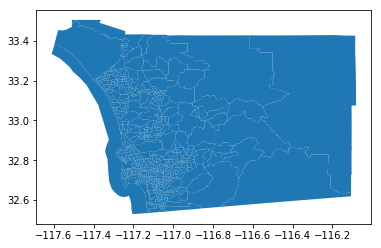

In [5]:
tracts = index_pkg.resource('tracts').geoframe()
tracts.plot()

In [6]:
tracts.head()

,geoid,statefp,countyfp,tractce,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,14000US06073017050,6,73,17050,170.50,Census Tract 170.50,G5020,S,4973506,0,32.961867,-117.077690,"POLYGON ((-117.084295 32.964573, -117.08424 32..."
1,14000US06073010014,6,73,10014,100.14,Census Tract 100.14,G5020,S,28491166,19560,32.575493,-116.978479,"POLYGON ((-117.040405 32.568361, -117.040397 3..."
2,14000US06073017813,6,73,17813,178.13,Census Tract 178.13,G5020,S,4725274,2140970,33.113797,-117.322016,"POLYGON ((-117.345527 33.144384, -117.344797 3..."
3,14000US06073990100,6,73,990100,9901.00,Census Tract 9901,G5020,S,0,659396026,32.929719,-117.329717,"POLYGON ((-117.611039 33.334125, -117.608684 3..."
4,14000US06073017054,6,73,17054,170.54,Census Tract 170.54,G5020,S,6725972,0,32.989533,-117.045904,"POLYGON ((-117.061872 32.983493, -117.061738 3..."


The ``geoid`` column is the main link column. Let's load in the one of the other datasets and link it to the index. 

In [7]:
import metapack as mp
planning_pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-planning-tracts-2.csv')
planning_pkg

This time, we'll load the resource as a dataframe, since this file has no geometry information

In [8]:
planning = planning_pkg.resource('sandiego_planning_db').dataframe()


Now we can link the datasets. Start with the Geoframe first, so the final linked dataset is also a geoframe(). 

In [9]:
df = tracts.set_index('geoid').join(planning.set_index('geoid'))

In [10]:
df.head()

,statefp,countyfp,tractce,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,...,pct_tea_mailoutmailback_cen_2010,pct_tea_update_leave_cen_2010,pct_census_mail_returns_cen_2010,pct_vacants_cen_2010,pct_deletes_cen_2010,pct_census_uaa_cen_2010,pct_mailback_count_cen_2010,pct_frst_frms_cen_2010,pct_rplcmnt_frms_cen_2010,pct_bilq_mailout_count_cen_2010
geoid,,,,,,,,,,,,,,,,,,,,,
14000US06073017050,6,73,17050,170.50,Census Tract 170.50,G5020,S,4973506,0,32.961867,...,100.0,NaN,75.21,1.22,0.0,3.66,95.12,75.21,0.00,NaN
14000US06073010014,6,73,10014,100.14,Census Tract 100.14,G5020,S,28491166,19560,32.575493,...,100.0,NaN,62.80,2.15,0.0,3.60,94.26,62.77,0.03,NaN
14000US06073017813,6,73,17813,178.13,Census Tract 178.13,G5020,S,4725274,2140970,33.113797,...,100.0,NaN,64.01,10.84,0.0,8.84,80.32,64.01,0.00,NaN
14000US06073990100,6,73,990100,9901.00,Census Tract 9901,G5020,S,0,659396026,32.929719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14000US06073017054,6,73,17054,170.54,Census Tract 170.54,G5020,S,6725972,0,32.989533,...,100.0,NaN,79.26,2.40,0.0,4.48,93.12,79.26,0.00,NaN


Now, select a column from the planning database portion of the joined dataset that you'd like to example. For this, you will need to [refer to the upstream documentation](https://www.census.gov/research/data/planning_database/2018/docs/2018_Tract_PDB_Documentation_V4.pdf) about what the columns are. Note that the columns in the upstream documentation are mixed case, but our version of the dataset has only lowercase. To make cut-and-pase easy, we'll use the ``.lower()`` method. 

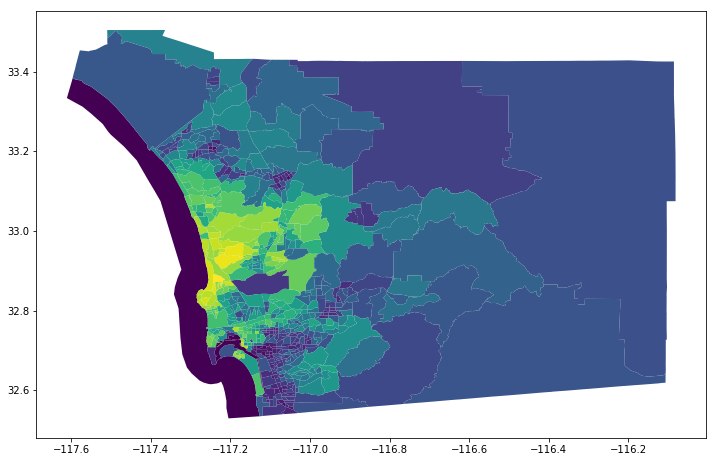

In [11]:
# pct_College_ACS_12_16 is "The percentage of the ACS population aged 25 years and over that have a college degree or higher"

fig, ax = plt.subplots(1, figsize=(12,8))

df.fillna(0).plot(ax=ax, column='pct_College_ACS_12_16'.lower())

We can link tracts to communities and cities with the `tract_links` dataset. This dataset also has tract geometry, so we can use it an an index. 

In [12]:
tract_links = index_pkg.resource('tract_links').geoframe()

In [13]:
tract_links.head().T

,0,1,2,3,4
geoid,14000US06073020309,14000US06073020207,14000US06073020211,14000US06073020209,14000US06073020206
city_name,County,Escondido,Escondido,Escondido,Escondido
city_code,CN,ES,ES,ES,ES
community_name,North County Metro,NaN,NaN,NaN,NaN
community_cpcode,190900,0,0,0,0
community_code,NOR,NaN,NaN,NaN,NaN
geometry,"POLYGON ((-117.121465 33.132039, -117.121422 3...","POLYGON ((-117.060258 33.135246, -117.060224 3...","POLYGON ((-117.072943 33.139046, -117.072574 3...","POLYGON ((-117.053329 33.140472, -117.0532 33....","POLYGON ((-117.065902 33.143224, -117.065549 3..."


In [14]:
df_tl = tract_links.set_index('geoid').join(planning.set_index('geoid'))

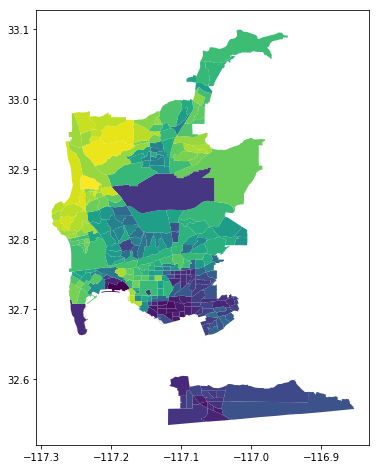

In [15]:
sd_tracts = df_tl[df_tl.city_code=='SD'].fillna(0)
fig, ax = plt.subplots(1, figsize=(12,8))
sd_tracts.plot(ax=ax, column='pct_College_ACS_12_16'.lower())